## Задача 1
- Прочитай файл 'marketing_mix.csv'
- Приведи дату к формату '2024-01-01'
- Приведи датафрейм к формату Дата, Источник, Доход
- Удали дубликаты по столбцам Дата, Источник
- Добавь столбец OS, если источник TikTok и Facebook, то 'Android', если Google Ads, то 'IOS', если Sales, то 'WEB'
- Сделай сводную: Динамика дохода по источникам по годам
- Выведи в удобный формат в Excel

In [1]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly

In [3]:
#Прочитай файл 'marketing_mix.csv'
marketing_mix_df = pd.read_csv('/Users/dmitrykomarov/Desktop/Python/TransFiles_yn2xc/marketing_mix.csv')

In [4]:
#Приведи дату к формату '2024-01-01'
marketing_mix_df['Date'] = marketing_mix_df['Date'].apply(lambda x: pd.to_datetime(x))
marketing_mix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        200 non-null    datetime64[ns]
 1   TikTok      200 non-null    float64       
 2   Facebook    200 non-null    float64       
 3   Google Ads  200 non-null    float64       
 4   Sales       200 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.9 KB


In [5]:
#Приведи датафрейм к формату Дата, Источник, Доход
marketing_melted = marketing_mix_df.melt(id_vars=['Date'], var_name='Source', value_name='Revenue')
marketing_melted


,Date,Source,Revenue
0,2018-01-07,TikTok,13528.10
1,2018-01-14,TikTok,0.00
2,2018-01-21,TikTok,0.00
3,2018-01-28,TikTok,0.00
4,2018-02-04,TikTok,0.00
...,...,...,...
795,2021-10-03,Sales,9030.17
796,2021-10-10,Sales,15904.11
797,2021-10-17,Sales,12839.29
798,2021-10-24,Sales,9063.45


In [6]:
#Удали дубликаты по столбцам Дата, Источник
marketing_melted = marketing_melted.drop_duplicates(subset=['Date', 'Source'])

In [7]:
#Добавь столбец OS, если источник TikTok и Facebook, то 'Android', если Google Ads, то 'IOS', если Sales, то 'WEB'
marketing_melted['OS'] = marketing_melted['Source'].apply(lambda x: 'Android' if x in ['TikTok', 'Facebook'] else 'IOS' if x == 'Google Ads' else 'WEB')
marketing_melted

,Date,Source,Revenue,OS
0,2018-01-07,TikTok,13528.10,Android
1,2018-01-14,TikTok,0.00,Android
2,2018-01-21,TikTok,0.00,Android
3,2018-01-28,TikTok,0.00,Android
4,2018-02-04,TikTok,0.00,Android
...,...,...,...,...
795,2021-10-03,Sales,9030.17,WEB
796,2021-10-10,Sales,15904.11,WEB
797,2021-10-17,Sales,12839.29,WEB
798,2021-10-24,Sales,9063.45,WEB


In [8]:
#Сделай сводную: Динамика дохода по источникам по годам
marketing_melted['Year'] = pd.to_datetime(marketing_melted['Date']).dt.year
pivot_table = marketing_melted.pivot_table(index='Year', columns='Source', values='Revenue', aggfunc='sum')
pivot_table

Source,Facebook,Google Ads,Sales,TikTok
Year,,,,
2018,126546.76,70454.86,569560.78,187560.21
2019,92665.35,83925.22,505560.27,95591.14
2020,126418.46,70708.90,572372.83,174940.12
2021,97086.44,79055.53,486134.42,131150.06


Text(0.5, 1.0, 'График прибыли по каждому из источников в разрезе с 2018-2021')

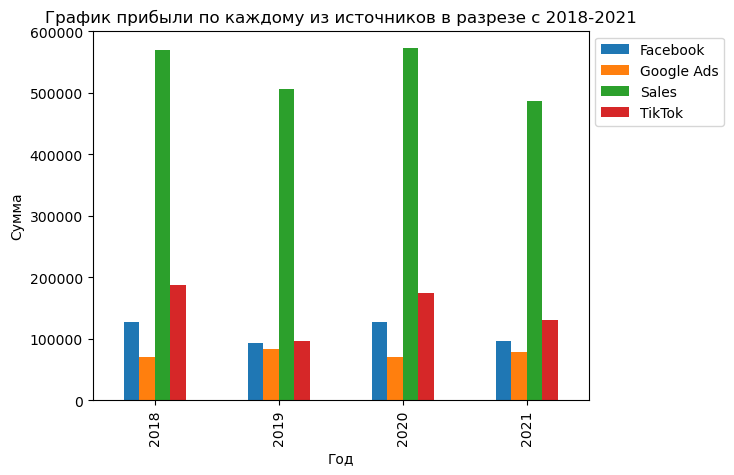

In [9]:
pivot_table.plot(kind='bar')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel("Год")
plt.ylabel('Сумма')
plt.title('График прибыли по каждому из источников в разрезе с 2018-2021')


In [10]:
#Выведи в удобный формат в Excel
marketing_melted['Date'] = pd.to_datetime(marketing_melted['Date']).dt.strftime('%Y-%m-%d')
pivot_table.to_excel('Revenue_Dynamics.xlsx')
marketing_melted.to_excel('Marketing_Mix.xlsx')

## Задача 2

- Написать 2 класса, первый - делает запросы, второй преобразует запрос в Dataframe
- Сделать 3 запроса и сформировать таблицу
- Вывести таблицу в сортировке по цене
- Выведи в удобный формат в Excel


- Endpoint
https://api.binance.com/api/v3/ticker/price

Query params:

symbol - string

1. BNBBTC
2. ETHBTC
3. LTCBTC


In [11]:
import requests

# Класс для выполнения запросов
class APIRequester:
    def __init__(self, url):
        self.url = url

    def get_price(self, symbol):
        params = {'symbol': symbol}
        response = requests.get(self.url, params=params)
        if response.status_code == 200:
            return response.json()
        else:
            raise Exception(f"Error fetching data for {symbol}: {response.status_code}")

# Класс для преобразования данных в DataFrame
class DataProcessor:
    def __init__(self):
        self.data = []

    def add_data(self, json_data):
        self.data.append(json_data)

    def to_dataframe(self):
        df = pd.DataFrame(self.data)
        df['price'] = df['price'].astype(float)  # Преобразуем цену в числовой формат
        return df

    def sort_by_price(self, df):
        return df.sort_values(by='price', ascending=False)

    def save_to_excel(self, df, file_name):
        df.to_excel(file_name, index=False)
        print(f"Data saved to {file_name}")


if __name__ == "__main__":
    url = "https://api.binance.com/api/v3/ticker/price"
    symbols = ['BNBBTC', 'ETHBTC', 'LTCBTC']

    requester = APIRequester(url)
    processor = DataProcessor()

 
    for symbol in symbols:
        data = requester.get_price(symbol)
        processor.add_data(data)

    # Преобразуем в DataFrame и сортируем по цене
    df = processor.to_dataframe()
    sorted_df = processor.sort_by_price(df)

    # Сохраняем результат в Excel
    processor.save_to_excel(sorted_df, "crypto_prices.xlsx")

    # Выводим DataFrame
    print(sorted_df)

Data saved to crypto_prices.xlsx
   symbol     price
1  ETHBTC  0.038720
0  BNBBTC  0.008764
2  LTCBTC  0.001073


## Задача 3

- Сделать SQL запрос и объяснить последовательность действий планировщика


Представим, что есть таблица в marts.source_os(по структуре как таблица с предпоследнего пункта задачи 1)

- Нужно сделать запрос, который вернёт такую таблицу:
OS|сумма дохода|сумма дохода всего|процент от всего дохода



```sql
DROP TABLE IF EXISTS marts;
-- Создам таблицу для наглядности
CREATE TABLE marts (
    Facebook INT,
    Google_Ads INT,
    Sales INT,
    TikTok INT
);
-- Заполню значениями
INSERT INTO marts (Facebook, Google_Ads, Sales, TikTok)
VALUES 
    (100, 200, 150, 50),
    (120, 250, 180, 80),
    (130, 220, 140, 60);
-- Создам 2 CTE
-- Первая CTE суммирует прибыль отдельно каждого источника 
WITH totals AS (
    SELECT 
        SUM(Facebook) AS total_facebook,
        SUM(Google_Ads) AS total_google,
        SUM(Sales) AS total_sales,
        SUM(TikTok) AS total_tiktok
    FROM marts
),
-- Вторая CTE суммирует общую прибыль источников
all_totals AS (
    SELECT 
        (total_facebook + total_google + total_sales + total_tiktok) * 1.0 AS total_all_income
    FROM totals
)
-- Основной запрос
SELECT 
    'Facebook' AS OS, 
    total_facebook AS sum_income,
    total_all_income AS total_income,
    ROUND((total_facebook / total_all_income) * 100, 2) AS percent_of_total
FROM totals, all_totals

UNION ALL

SELECT 
    'Google_Ads' AS OS, 
    total_google AS sum_income,
    total_all_income AS total_income,
    ROUND((total_google / total_all_income) * 100, 2) AS percent_of_total
FROM totals, all_totals

UNION ALL

SELECT 
    'Sales' AS OS, 
    total_sales AS sum_income,
    total_all_income AS total_income,
    ROUND((total_sales / total_all_income) * 100, 2) AS percent_of_total
FROM totals, all_totals

UNION ALL

SELECT 
    'TikTok' AS OS, 
    total_tiktok AS sum_income,
    total_all_income AS total_income,
    ROUND((total_tiktok / total_all_income) * 100, 2) AS percent_of_total
FROM totals, all_totals;

# Второй вариант используя sqlalchemy

%pip install sqlalchemy




```python
from sqlalchemy import create_engine, Column, Integer, select, func
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker

DATABASE_URI = 'sqlite:///example.db'
engine = create_engine(DATABASE_URI)
Base = declarative_base()

class Marts(Base):
    __tablename__ = 'marts'
    id = Column(Integer, primary_key=True, autoincrement=True)
    Facebook = Column(Integer)
    Google_Ads = Column(Integer)
    Sales = Column(Integer)
    TikTok = Column(Integer)

Base.metadata.create_all(engine)

Session = sessionmaker(bind=engine)
session = Session()

def insert_data():
    data = [
        Marts(Facebook=100, Google_Ads=200, Sales=150, TikTok=50),
        Marts(Facebook=120, Google_Ads=250, Sales=180, TikTok=80),
        Marts(Facebook=130, Google_Ads=220, Sales=140, TikTok=60),
    ]
    session.bulk_save_objects(data)
    session.commit()

def calculate_totals():
    totals_query = select([
        func.sum(Marts.Facebook).label('total_facebook'),
        func.sum(Marts.Google_Ads).label('total_google'),
        func.sum(Marts.Sales).label('total_sales'),
        func.sum(Marts.TikTok).label('total_tiktok'),
    ])

    totals_result = session.execute(totals_query).fetchone()

    total_all_income = (
        totals_result.total_facebook + 
        totals_result.total_google + 
        totals_result.total_sales + 
        totals_result.total_tiktok
    )

    result = []

    for platform, total in zip(['Facebook', 'Google_Ads', 'Sales', 'TikTok'], 
                                [totals_result.total_facebook, totals_result.total_google, 
                                 totals_result.total_sales, totals_result.total_tiktok]):
        percent_of_total = (total / total_all_income) * 100 if total_all_income > 0 else 0
        result.append({
            'OS': platform,
            'sum_income': total,
            'total_income': total_all_income,
            'percent_of_total': round(percent_of_total, 2)
        })

    return result

if __name__ == "__main__":
    totals = calculate_totals()
    for entry in totals:
        print(entry)

session.close()

# Задание 4 
#### Представлена выгрузка о полученных событиях приложения Х при показе рекламы источником У. Условиями договора с рекламодателем определено, что оплачиваются только события, по которым от даты установки до события прошло не более 2 суток. Ставка за событие составляет: 200 у.е. по Сан-Паулу и 100 у.е. по остальным городам. Adset 2 не оплачивается. Определить сумму, которую рекламодатель выплатит по результатам данной рекламной компании.

In [12]:
url = 'https://docs.google.com/spreadsheets/d/15Wt58816oAAsPGnp8swo6Tm0WnkhRZOb2Q1d-bUVtu8/gviz/tq?tqx=out:csv'

In [13]:
df = pd.read_csv(url, header=0)
df

,Install Time,Event Time,Adset,City
0,4/13/22 1:24,4/14/22 22:50,17,Petropolis
1,4/14/22 2:27,4/14/22 21:10,17,Otelo
2,4/13/22 1:44,4/14/22 19:57,17,Teresopolis
3,4/14/22 1:51,4/14/22 17:56,17,Penapolis
4,4/14/22 16:30,4/14/22 16:37,17,Guapo
...,...,...,...,...
164,4/6/22 0:41,4/6/22 1:23,2,Aquiraz
165,4/5/22 21:30,4/5/22 21:38,2,Santa Adelia
166,4/5/22 1:09,4/5/22 1:24,1,Florianopolis
167,4/4/22 11:55,4/4/22 11:59,1,Formosa


In [14]:
df.isnull().sum()

Install Time    0
Event Time      0
Adset           0
City            0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Install Time  169 non-null    object
 1   Event Time    169 non-null    object
 2   Adset         169 non-null    int64 
 3   City          169 non-null    object
dtypes: int64(1), object(3)
memory usage: 5.4+ KB


In [16]:
# Преобразование времени
df['Install Time'] = pd.to_datetime(df['Install Time'])
df['Event Time'] = pd.to_datetime(df['Event Time'])

# Вычисление разницы во времени
df['Time Difference'] = (df['Event Time'] - df['Install Time']).dt.total_seconds()  
df

/var/folders/dk/n71lg2t15112j9nnvkz6cznm0000gn/T/ipykernel_3119/527044111.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Install Time'] = pd.to_datetime(df['Install Time'])
/var/folders/dk/n71lg2t15112j9nnvkz6cznm0000gn/T/ipykernel_3119/527044111.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Event Time'] = pd.to_datetime(df['Event Time'])


,Install Time,Event Time,Adset,City,Time Difference
0,2022-04-13 01:24:00,2022-04-14 22:50:00,17,Petropolis,163560.0
1,2022-04-14 02:27:00,2022-04-14 21:10:00,17,Otelo,67380.0
2,2022-04-13 01:44:00,2022-04-14 19:57:00,17,Teresopolis,151980.0
3,2022-04-14 01:51:00,2022-04-14 17:56:00,17,Penapolis,57900.0
4,2022-04-14 16:30:00,2022-04-14 16:37:00,17,Guapo,420.0
...,...,...,...,...,...
164,2022-04-06 00:41:00,2022-04-06 01:23:00,2,Aquiraz,2520.0
165,2022-04-05 21:30:00,2022-04-05 21:38:00,2,Santa Adelia,480.0
166,2022-04-05 01:09:00,2022-04-05 01:24:00,1,Florianopolis,900.0
167,2022-04-04 11:55:00,2022-04-04 11:59:00,1,Formosa,240.0


In [17]:
two_days_in_seconds = 2*24*60*60

valid_events = df[
    (df['Time Difference'] < two_days_in_seconds) & 
    (df['Adset'] != 2)  # Adset 2 не оплачивается
]

In [18]:
valid_events['Payment'] = valid_events.apply(
    lambda x: 200 if x['City'] == "Sao Paulo" else 100, axis=1
)

/var/folders/dk/n71lg2t15112j9nnvkz6cznm0000gn/T/ipykernel_3119/2806555848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_events['Payment'] = valid_events.apply(


In [19]:
# Общая сумма выплат
total_payment = valid_events['Payment'].sum()

print(f"Общая сумма выплат: {total_payment} у.е.")

Общая сумма выплат: 16500 у.е.


### Общая сумма выплат: 16500 у.е.

# Если все понравилось
## контакт для связи tg: @bl3sk_soul